In [1]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
dns = os.listdir("../../MIST_additional_holdout/data/")
dns.remove('spot_metadata.tsv')

In [3]:
gene_sparse_dfs = []
for dn in tqdm(dns):
    df = pd.read_csv(f"../../MIST_additional_holdout/data/{dn}/raw.csv", index_col=0)
    gene_sparse_df = pd.DataFrame(((df == 0).sum() / df.shape[0]) * 100, columns=['sparsity'])
    gene_sparse_df['data'] = dn
    gene_sparse_dfs.append(gene_sparse_df.round(1))
gene_sparse_dfs = pd.concat(gene_sparse_dfs)

  0%|          | 0/13 [00:00<?, ?it/s]

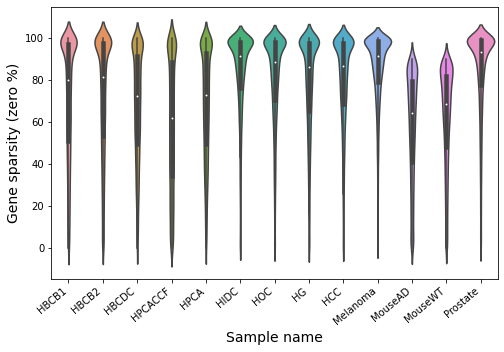

In [7]:
f, ax = plt.subplots(1,1,figsize=(8,5))

data_names = ['Human_Breast_Cancer_BAS1', 'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE',
              'Human_Breast_Cancer_BAS2', 'Human_Breast_Cancer_Ductal_Carcinoma_FFPE','Human_Glioblastoma', 
              'Melanoma', 'MouseAD', 'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 
              'MouseWT', 'Human_Colorectal_Cancer','Human_Prostate_Cancer_Adenocarcinoma_FFPE','Prostate']

data_shorts = dict(zip(data_names, ['HBCB1', 'HPCACCF',
                                    'HBCB2', 'HBCDC', 'HG',
                                    'Melanoma', 'MouseAD', 'HIDC', 'HOC',
                                    'MouseWT', 'HCC', 'HPCA', 'Prostate']))

data_order = ['Human_Breast_Cancer_BAS1', 'Human_Breast_Cancer_BAS2',  'Human_Breast_Cancer_Ductal_Carcinoma_FFPE',             
              'Human_Prostate_Cancer_Acinar_Cell_Carcinoma_FFPE', 'Human_Prostate_Cancer_Adenocarcinoma_FFPE',
              'Human_Invasive_Ductal_Carcinoma', 'Human_Ovarian_Cancer', 'Human_Glioblastoma', 'Human_Colorectal_Cancer', 
              'Melanoma', 'MouseAD', 'MouseWT', 'Prostate']
tick_labels = [data_shorts[dn] for dn in data_order]
sns.violinplot(data=gene_sparse_dfs,x='data', y='sparsity', ax=ax, order=data_order)
ax.set_xlabel("Sample name", fontsize=14)
ax.set_ylabel("Gene sparsity (zero %)", fontsize=14)
ax.set_xticklabels(tick_labels, rotation=40, ha='right');
plt.savefig("Supp_Fig1_Data_Sparsity.png", dpi=100, bbox_inches='tight')

In [9]:
df = gene_sparse_dfs.groupby("data").sparsity.describe()
df.to_excel("Source Data Supp. Fig1.xlsx", sheet_name='Supp. Fig1')